Data Collection
===================

In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/twitter_training.csv"
df=pd.read_csv(url, header=None)

# Display the current DataFrame to understand its structure
print("Current DataFrame:")
print(df.head())

# Manually assign column names based on your data structure
# Assuming your data format is like: id, col1, col2, col3, sentiment
# Replace with your actual column names
column_names = ['id', 'some_column_name', 'target', 'sentiment']

# Assign the column names to the DataFrame
df.columns = column_names

# Display the DataFrame with updated column names
print("\nDataFrame with Updated Column Names:")
print(df.head())

# Now, the first row contains your actual data and the column names are correctly assigned


Current DataFrame:
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

DataFrame with Updated Column Names:
     id some_column_name    target  \
0  2401      Borderlands  Positive   
1  2401      Borderlands  Positive   
2  2401      Borderlands  Positive   
3  2401      Borderlands  Positive   
4  2401      Borderlands  Positive   

                                           sentiment  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting 

Data Cleaning
===============

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                74682 non-null  int64 
 1   some_column_name  74682 non-null  object
 2   target            74682 non-null  object
 3   sentiment         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [48]:
df = df[df['sentiment'].notna()]

In [49]:
df['target'].value_counts()

target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [50]:
mappings = {'Irrelevant': 'Neutral'}
df['target'] = df['target'].replace(mappings)

In [51]:
df['target'].value_counts()

target
Neutral     30983
Negative    22358
Positive    20655
Name: count, dtype: int64

In [52]:
df.drop(columns=["id","some_column_name"],inplace=True)

In [53]:
!pip install emoji

In [54]:
import unicodedata

def has_emoji(text_list):
    for text in text_list:
        for char in text:
            if char != ' ' and unicodedata.name(char).startswith('EMOJI'):
                return True
    return False

# Apply the function to the 'sentiment' column
df['has_emoji'] = df['sentiment'].apply(has_emoji)

df.head()

,target,sentiment,has_emoji
0,Positive,im getting on borderlands and i will murder yo...,False
1,Positive,I am coming to the borders and I will kill you...,False
2,Positive,im getting on borderlands and i will kill you ...,False
3,Positive,im coming on borderlands and i will murder you...,False
4,Positive,im getting on borderlands 2 and i will murder ...,False


In [55]:
df['has_emoji'].value_counts()

has_emoji
False    73994
True         2
Name: count, dtype: int64

In [56]:
df = df[df["has_emoji"] == False]

In [57]:
df['sentiment']=df['sentiment'].str.lower()
df.head()

,target,sentiment,has_emoji
0,Positive,im getting on borderlands and i will murder yo...,False
1,Positive,i am coming to the borders and i will kill you...,False
2,Positive,im getting on borderlands and i will kill you ...,False
3,Positive,im coming on borderlands and i will murder you...,False
4,Positive,im getting on borderlands 2 and i will murder ...,False


In [58]:
def remove_whitespace(text):
    return  " ".join(text.split())


df['sentiment']=df['sentiment'].apply(remove_whitespace)
df.head()

,target,sentiment,has_emoji
0,Positive,im getting on borderlands and i will murder yo...,False
1,Positive,i am coming to the borders and i will kill you...,False
2,Positive,im getting on borderlands and i will kill you ...,False
3,Positive,im coming on borderlands and i will murder you...,False
4,Positive,im getting on borderlands 2 and i will murder ...,False


In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
from nltk import word_tokenize
df['sentiment']=df['sentiment'].apply(lambda X: word_tokenize(X))
df.head()

,target,sentiment,has_emoji
0,Positive,"[im, getting, on, borderlands, and, i, will, m...",False
1,Positive,"[i, am, coming, to, the, borders, and, i, will...",False
2,Positive,"[im, getting, on, borderlands, and, i, will, k...",False
3,Positive,"[im, coming, on, borderlands, and, i, will, mu...",False
4,Positive,"[im, getting, on, borderlands, 2, and, i, will...",False


In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')


def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result


df['sentiment']=df['sentiment'].apply(remove_stopwords)
df.head()

,target,sentiment,has_emoji
0,Positive,"[im, getting, borderlands, murder, ,]",False
1,Positive,"[coming, borders, kill, ,]",False
2,Positive,"[im, getting, borderlands, kill, ,]",False
3,Positive,"[im, coming, borderlands, murder, ,]",False
4,Positive,"[im, getting, borderlands, 2, murder, ,]",False


In [63]:
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst


df['sentiment']=df['sentiment'].apply(remove_punct)
df.head()

,target,sentiment,has_emoji
0,Positive,"[im, getting, borderlands, murder]",False
1,Positive,"[coming, borders, kill]",False
2,Positive,"[im, getting, borderlands, kill]",False
3,Positive,"[im, coming, borderlands, murder]",False
4,Positive,"[im, getting, borderlands, 2, murder]",False


In [64]:
def keep_alphabetical_only(sentiment_list):
    return [word for word in sentiment_list if word.isalpha()]

# Apply the function to the 'sentiment' column
df['sentiment'] = df['sentiment'].apply(keep_alphabetical_only)
df.head()

,target,sentiment,has_emoji
0,Positive,"[im, getting, borderlands, murder]",False
1,Positive,"[coming, borders, kill]",False
2,Positive,"[im, getting, borderlands, kill]",False
3,Positive,"[im, coming, borderlands, murder]",False
4,Positive,"[im, getting, borderlands, murder]",False


In [65]:
def remove_im(sentiment_list):
    return [word for word in sentiment_list if word != 'im']

# Apply the function to the 'sentiment' column
df['sentiment'] = df['sentiment'].apply(remove_im)
df.head()

,target,sentiment,has_emoji
0,Positive,"[getting, borderlands, murder]",False
1,Positive,"[coming, borders, kill]",False
2,Positive,"[getting, borderlands, kill]",False
3,Positive,"[coming, borderlands, murder]",False
4,Positive,"[getting, borderlands, murder]",False


In [66]:
# Convert lists to tuples in the 'sentiment' column
df['sentiment'] = df['sentiment'].apply(tuple)

# Drop duplicates
df = df.drop_duplicates()

# Convert tuples back to lists (if necessary)
df['sentiment'] = df['sentiment'].apply(list)

# Update the len_sent_1 column to reflect the new length of sentiment lists
# df['len_sent_1'] = df['sentiment'].apply(len)

# Check the shape after dropping duplicates
print("Shape after dropping duplicates:", df.shape)

# Print the updated DataFrame
# print(df)

Shape after dropping duplicates: (61093, 3)


<ipython-input-66-b2f3a0fb161d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].apply(list)


In [67]:
def remove_single_letters(text):
    return [word for word in text if len(word) > 1]

# Apply the function to the 'sentiment' column
df['sentiment'] = df['sentiment'].apply(remove_single_letters)

In [68]:
df["len_sent"] = df['sentiment'].apply(lambda X: len(X))
df.head()

,target,sentiment,has_emoji,len_sent
0,Positive,"[getting, borderlands, murder]",False,3
1,Positive,"[coming, borders, kill]",False,3
2,Positive,"[getting, borderlands, kill]",False,3
3,Positive,"[coming, borderlands, murder]",False,3
6,Positive,"[spent, hours, making, something, fun, know, h...",False,26


In [69]:
df = df[df['len_sent'] != 0]
df.shape

(61072, 4)

In [70]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(text):

    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()

        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'

        result.append(wordnet.lemmatize(token,pos))

    return result


df['sentiment']=df['sentiment'].apply(lemmatization)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,sentiment,has_emoji,len_sent
0,Positive,"[get, borderland, murder]",False,3
1,Positive,"[come, border, kill]",False,3
2,Positive,"[get, borderland, kill]",False,3
3,Positive,"[come, borderland, murder]",False,3
6,Positive,"[spent, hour, make, something, fun, know, huge...",False,26


In [71]:
df.drop(columns=["has_emoji","len_sent"],inplace=True)

In [72]:
df['sentiment_joined'] = df['sentiment'].apply(lambda x: ' '.join(x))
df.head()

,target,sentiment,sentiment_joined
0,Positive,"[get, borderland, murder]",get borderland murder
1,Positive,"[come, border, kill]",come border kill
2,Positive,"[get, borderland, kill]",get borderland kill
3,Positive,"[come, borderland, murder]",come borderland murder
6,Positive,"[spent, hour, make, something, fun, know, huge...",spent hour make something fun know huge border...


In [73]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [74]:
chat_words_dict = dict(line.split('=') for line in chat_words_str.strip().split('\n'))

# Function to check for chat words
def contains_chat_word(text):
    words = text.split()
    for word in words:
        if word in chat_words_dict:
            return True
    return False

# Apply the function to the DataFrame
df['contains_chat_word'] = df['sentiment_joined'].apply(contains_chat_word)

# Print the DataFrame with the new column
print(df)

         target                                          sentiment  \
0      Positive                          [get, borderland, murder]   
1      Positive                               [come, border, kill]   
2      Positive                            [get, borderland, kill]   
3      Positive                         [come, borderland, murder]   
6      Positive  [spent, hour, make, something, fun, know, huge...   
...         ...                                                ...   
74676  Positive  [realize, window, partition, mac, like, year, ...   
74678  Positive  [realize, mac, window, partition, year, behind...   
74679  Positive  [realize, window, partition, mac, year, behind...   
74680  Positive  [realize, window, partition, mac, like, year, ...   
74681  Positive  [like, window, partition, mac, like, year, beh...   

                                        sentiment_joined  contains_chat_word  
0                                  get borderland murder               False  
1

In [75]:
df['contains_chat_word'].value_counts()

contains_chat_word
False    61072
Name: count, dtype: int64

Data Analysis
=============

In [28]:
df.head()

,target,sentiment,sentiment_joined
0,Positive,"[get, borderland, murder]",get borderland murder
1,Positive,"[come, border, kill]",come border kill
2,Positive,"[get, borderland, kill]",get borderland kill
3,Positive,"[come, borderland, murder]",come borderland murder
6,Positive,"[spent, hour, make, something, fun, know, huge...",spent hour make something fun know huge border...


In [29]:
df['target'].value_counts()

target
Neutral     26019
Negative    18701
Positive    16352
Name: count, dtype: int64

count    61072.000000
mean        74.311239
std         49.196396
min          1.000000
25%         36.000000
50%         64.000000
75%        102.000000
max        796.000000
Name: text_length, dtype: float64


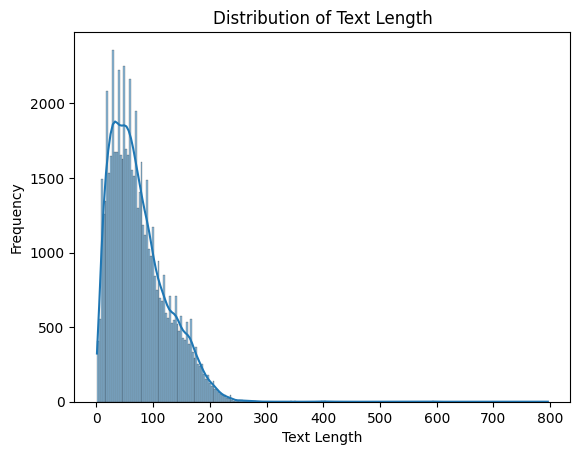

In [30]:
# Add a text length column
df['text_length'] = df['sentiment_joined'].apply(len)

# Display the text length statistics
print(df['text_length'].describe())

# Visualize the text length distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


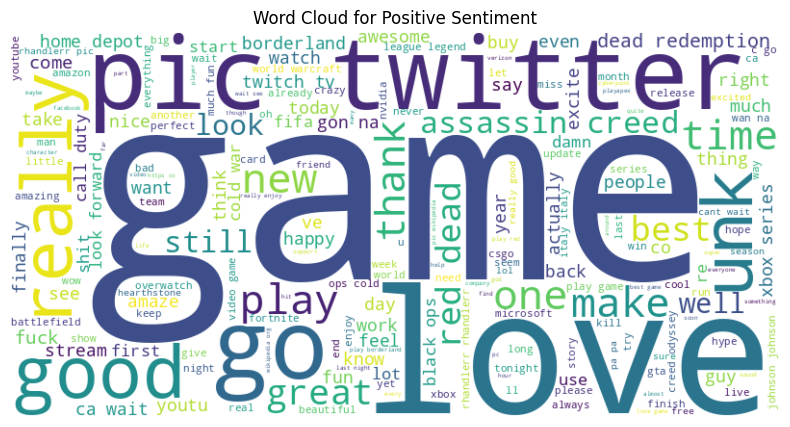

In [31]:
from wordcloud import WordCloud

# Combine all text for positive sentiment
positive_texts = ' '.join(df[df['target'] == 'Positive']['sentiment_joined'])

# Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


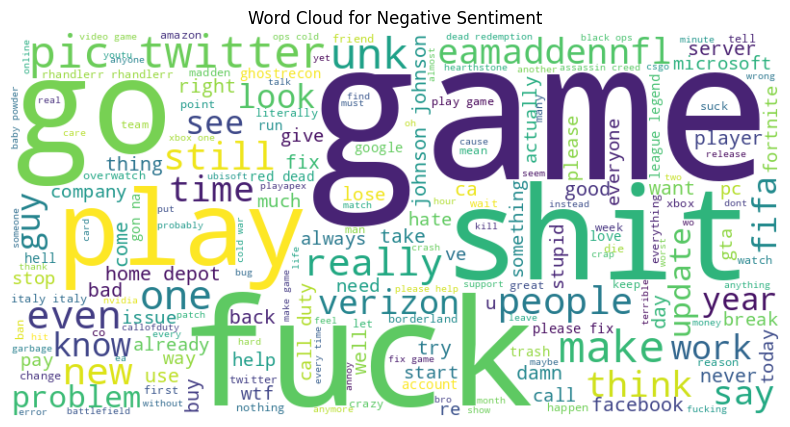

In [33]:
from wordcloud import WordCloud

# Combine all text for positive sentiment
positive_texts = ' '.join(df[df['target'] == 'Negative']['sentiment_joined'])

# Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


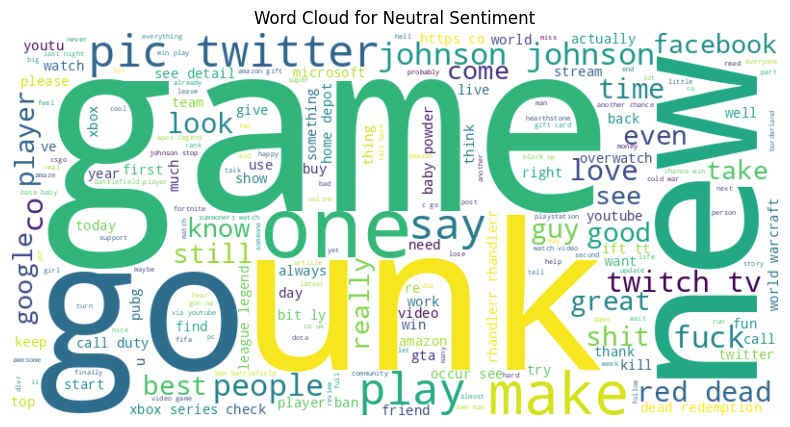

In [35]:
from wordcloud import WordCloud

# Combine all text for positive sentiment
positive_texts = ' '.join(df[df['target'] == 'Neutral']['sentiment_joined'])

# Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()


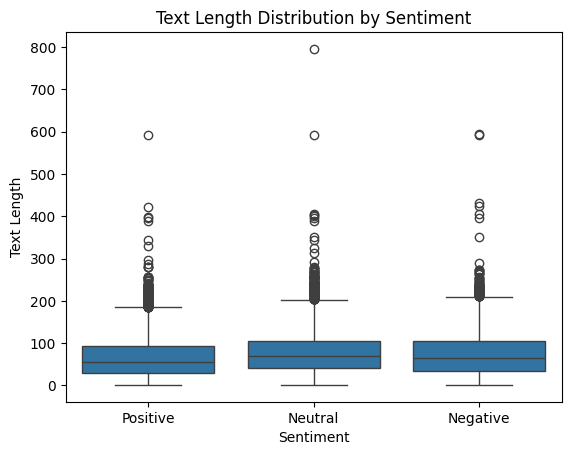

In [36]:
# Boxplot of text length by sentiment
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


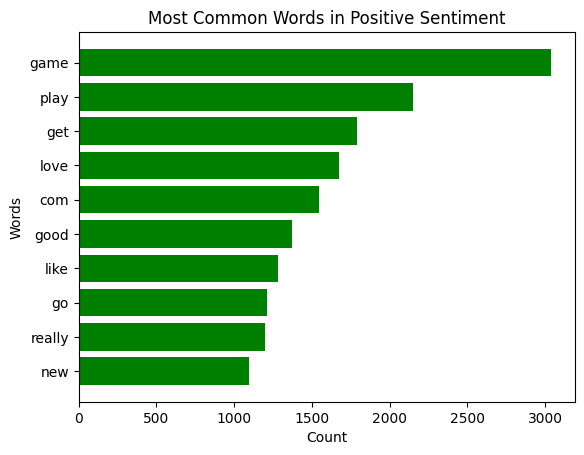

In [37]:
from collections import Counter
from nltk.corpus import stopwords

# Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    return Counter(tokens).most_common(n)

# Combine text by sentiment
positive_text = ' '.join(df[df['target'] == 'Positive']['sentiment_joined'])

# Get most common words
common_words_pos = get_most_common_words(positive_text, 10)

# Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Positive Sentiment')
plt.gca().invert_yaxis()
plt.show()


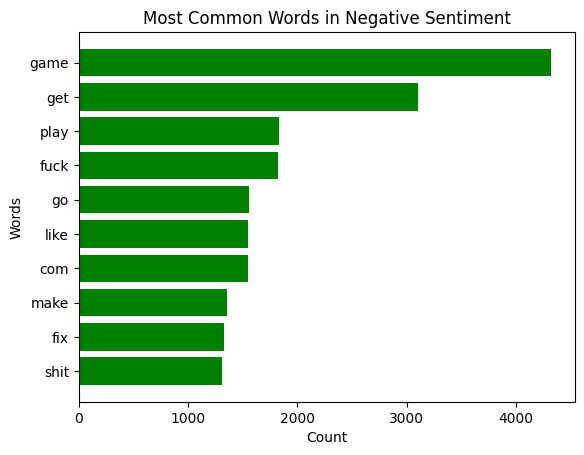

In [38]:
from collections import Counter
from nltk.corpus import stopwords

# Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    return Counter(tokens).most_common(n)

# Combine text by sentiment
positive_text = ' '.join(df[df['target'] == 'Negative']['sentiment_joined'])

# Get most common words
common_words_pos = get_most_common_words(positive_text, 10)

# Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Negative Sentiment')
plt.gca().invert_yaxis()
plt.show()


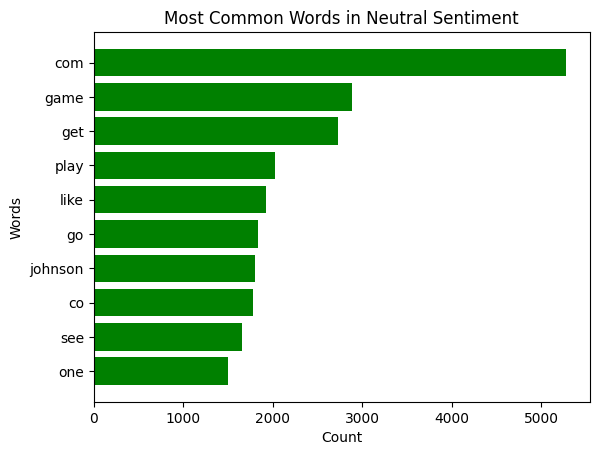

In [39]:
from collections import Counter
from nltk.corpus import stopwords

# Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    return Counter(tokens).most_common(n)

# Combine text by sentiment
positive_text = ' '.join(df[df['target'] == 'Neutral']['sentiment_joined'])

# Get most common words
common_words_pos = get_most_common_words(positive_text, 10)

# Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Neutral Sentiment')
plt.gca().invert_yaxis()
plt.show()


Model Training
==============

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentiment_joined'])

In [77]:
from sklearn.preprocessing import LabelEncoder

# Convert target column to numerical values
le = LabelEncoder()
y = le.fit_transform(df['target'])

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [79]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
model = RandomForestClassifier()

# Train the ExtraTreesRegressor
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)

r2_test = accuracy_score(y_test, y_pred)

r2_train = accuracy_score(y_train, y_pred_train)
print(r2_test,r2_train)

0.9146950470732705 0.9964181181816321


In [81]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3740
           1       0.90      0.94      0.92      5204
           2       0.92      0.87      0.90      3271

    accuracy                           0.91     12215
   macro avg       0.92      0.91      0.91     12215
weighted avg       0.92      0.91      0.91     12215



In [40]:
pd.Series(y_train).value_counts()

1    20815
0    14961
2    13081
Name: count, dtype: int64

In [88]:
a = "i have RE bike in my carrage "
a = a.lower()
a = " ".join(a.split())
a = word_tokenize(a)
a = remove_stopwords(a)
a = remove_punct(a)
a = keep_alphabetical_only(a)
a = remove_single_letters(a)
a = lemmatization(a)
a = " ".join(a)
a

'bike carrage'

In [89]:
aa_transformed = vectorizer.transform([a])

# Predict the sentiment using the loaded model
y_pred = model.predict(aa_transformed)
print(y_pred)

[1]


In [90]:
import pickle

with open('rf.pkl', 'wb') as file:
   pickle.dump(model, file)